# 다항 회귀와 과대적합/과소적합

사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않음  
대신 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현  
PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식)피처로 변환  
PolynomialFeatures클래스는 degree 파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환

In [2]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처: \n', X)

#degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처: 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [3]:
#3차 다항 회귀 함수를 임의로 설정하고 이의 회귀 계수 예측
#y = 1 + 2x1 + 3x1^2 + 4x2^2로 설정하고 이를 위한 함수 polynomial_func()를 만듦
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 단항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 단항식 결정값: 
 [  5 125]


In [4]:
from sklearn.linear_model import LinearRegression
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [5]:
#사이킷런의 Pipeline객체를 이용해 한 번에 다항회구 구현하는 것이 더 명료
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y
#Pipeline객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression 연결
model = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해
다항 회귀의 차수(degree)를 높일 수록 과적합 문제가 크게 발생

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)
#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

#y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.0432087498723184 입니다.

Degree 15 회귀 계수는 [-2.98294000e+03  1.03899850e+05 -1.87416981e+06  2.03717199e+07
 -1.44874017e+08  7.09319141e+08 -2.47067173e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920643e+09 -1.70382078e+08] 입니다.
Degree 15 MSE는 182581084.8263125 입니다.


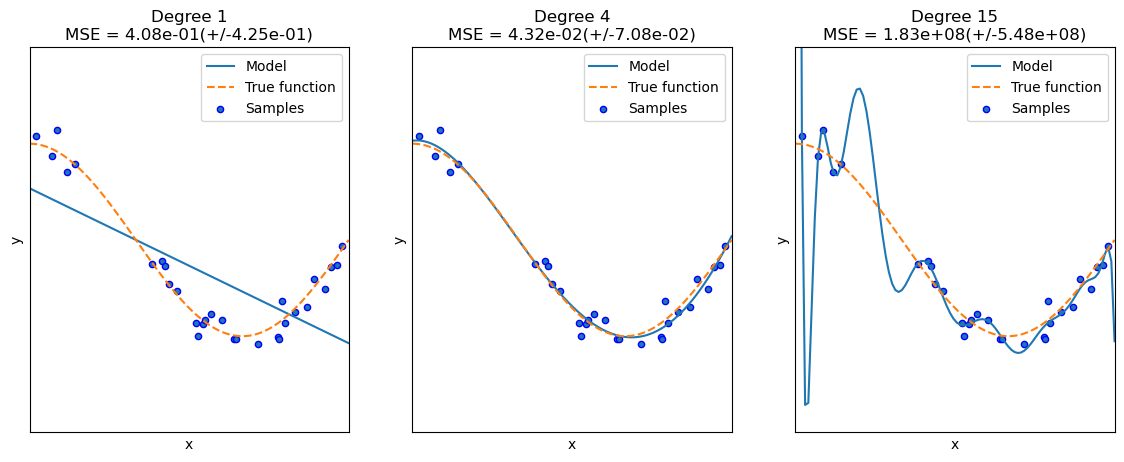

In [12]:
#예측 결과를 비교할 다항식 차수를 1,4,15로 변경하며 결과 비교
plt.figure(figsize = (14,5))
degrees = [1,4,15]
#다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks = (), yticks = ())

    #개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_feature', polynomial_features), ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)

    #교차검증으로 다항회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring = 'neg_mean_squared_error', cv = 10)
    #Pipeline을 구성하는 세부 객체를 접근한ㄴ named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1 * np.mean(scores)))

    #0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다
    X_test = np.linspace(0,1,100)
    #예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = 'Model')
    #실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label = 'True function')
    plt.scatter(X, y, edgecolor = 'b', s = 20, label = 'Samples')

    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc = 'best')
    plt.title('Degree {}\nMSE = {:.2e}(+/-{:.2e})'.format(degrees[i], -scores.mean(), scores.std()))
plt.show()

### 편향 분산 트레이드 오프
일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있음  
편향이 높으면 분산은 낮아지고(과소적합)  
편향이 낮으면 분산은 높아짐(과적합)

## 규제 선형 모델 = 릿지, 라쏘, 엘라스틱넷
규제: 비용함수에 alpha값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식  
L2규제: W의 제곱에 페널티를 부여하는 방식, 릿지 회귀  
L1규제: w의 절댓값에 페널티를 부여하는 방식, 라쏘 회귀, 영향력이 크지 않은 회귀 계수 값을 0으로 변환

### 릿지 회귀
주요 생성 파라미터: alpha - 릿지 회귀의 alpha L2 규제 계수

In [16]:
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
bostonDF = pd.DataFrame(data, columns = columns)
bostonDF['PRICE'] = target

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


In [19]:
alphas = [0, 0.1, 1, 10, 100]

#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha = alpha)

    #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 대 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 대 5 folds의 평균 RMSE: 5.829
alpha 0.1 일 대 5 folds의 평균 RMSE: 5.788
alpha 1 일 대 5 folds의 평균 RMSE: 5.653
alpha 10 일 대 5 folds의 평균 RMSE: 5.518
alpha 100 일 대 5 folds의 평균 RMSE: 5.330


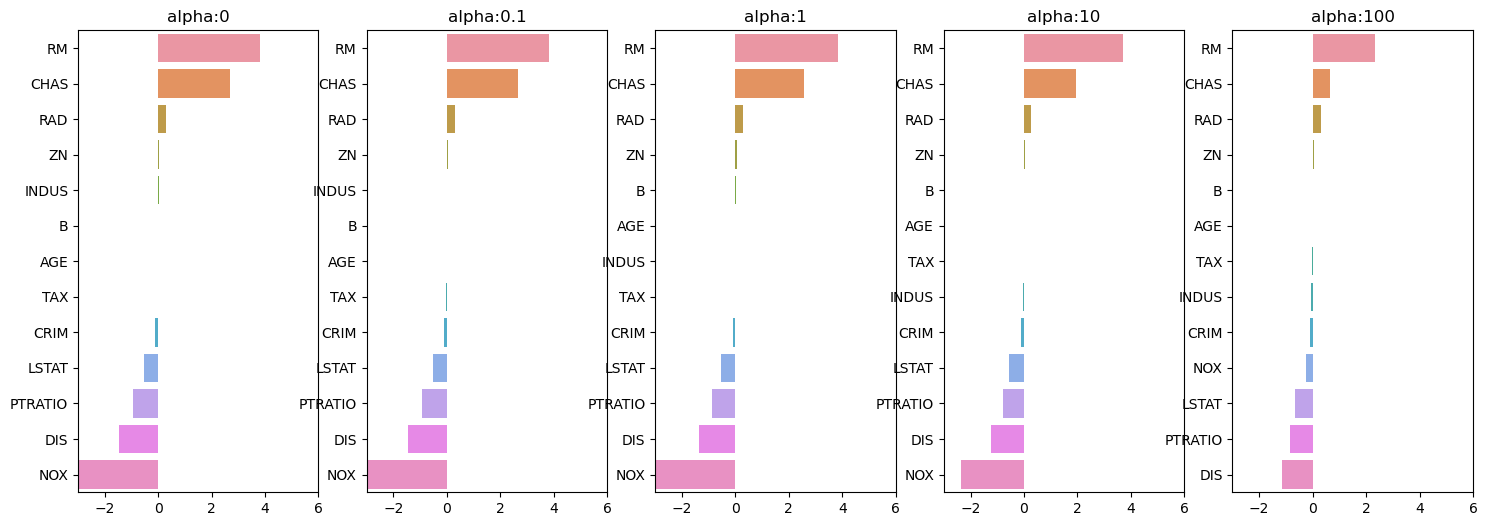

In [26]:
import seaborn as sns
#각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols = 5)
#각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    #막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화, 회귀 계수 값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])

plt.show()

In [28]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘 회귀
W의 절댓값에 페널티를 부여하는 L1 규제를 선형 회귀에 적용한 것이 라쏘 회귀  
L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거  
L1 규제는 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가짐  

In [50]:
from sklearn.linear_model import Lasso, ElasticNet

#alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 변환
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True, return_coeff = True):
    coeff_df = pd.DataFrame()
    if verbose : print('#####', model_name, '#####')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha = param)
        elif model_name == 'Lasso': model = Lasso(alpha = param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha = param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = 'neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0} 일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        #cross_val_score는 evaluation matric만 반환하므로 모델을 다시 학습하여 회귀 추출
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            #alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
            coeff = pd.Series(data = model.coef_, index = X_data_n.columns)
            colname = 'alpha:' + str(param)
            coeff_df[colname] = coeff

    return coeff_df

In [51]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

##### Lasso #####
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3 일 때 5 폴드 세트의 평균 RMSE: 6.189


### 엘라스틱넷 회귀
L2규제와 L1규제를 결합한 회귀  
라쏘 회귀가 서로 상관관계가 높은 피처들의 경우 이들 중 중요 피처만 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만듦  
이러한 이유로 alpha값에 따라 회귀 계수의 값이 급격히 변동할 수 있는데 엘라스틱넷 회귀는 이를 완화하기 위해 L2규제를 라쏘 회귀에 추가  
단점은 수행시간이 오래 걸림

ElasticNet 클래스의 생성 파라미터는 alpha와 l1_ratio  
엘라스틱넷의 규제는 a * L1 + b * L2로 정의  
이때 a는 L1 규제의 alpha값, b는 L2 규제의 alpha값  
따라서 ElasticNet 클래스의 alpha파라미터 값은 a+b  
ElasticNet의 l1_ratio 파라미터 값은 a / (a+b)  
l1_ratio가 0이면 a가 0이므로 L2규제와 동일  
l1_ratio가 1이면 b가 0이므로 L1규제와 동일

In [52]:
#엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval()함수 호출
#l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas,
                                       X_data_n = X_data, y_target_n = y_target)

##### ElasticNet #####
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.597
alpha 3 일 때 5 폴드 세트의 평균 RMSE: 6.068


In [53]:
#반환된 coeff_elasitc_df를 첫 번째 칼럼 순으로 내림차순 정렬해 회귀계수 DF 출력
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by = sort_column, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## 선형 회귀 모델을 위한 데이터 변환
선형 회귀 모델은 피처값과 타깃값의 분포가 정규분포형태를 매우 선호  
사이킷런 이용해 피처 데이터 세트에 적용하는 변환 작업  
1. StandardScaler를 이용해 표준 정규분포를 가진 데이터셋으로 변환하거나 MinMaxScaler클래스를 이용해 최솟값0, 최댓값1인 값으로 정규화
2. 스케일링/정규화를 수행한 데이터셋에 다시 다항 특성을 적용하여 변환
3. 원래 값에 log함수를 적용하면 보다 정규분포에 가까운 형태로 값이 분포. log변환

타깃값의 경우 일반적으로 로그 변환을 수행  

In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

#method는 Standard, MinMax, Log 결정
#p_degree는 다항식 특성을 추가할 때 적용, p_degree는 2이상 부여하지 않음
def get_scaled_data(method = 'None', p_degree = None, input_data = None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree = p_degree,
                                         include_bias = False).fit_transform(scaled_data)
    return scaled_data

In [57]:
#Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]
#5개 방식으로 변환, 먼저 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
#최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1],
                                    input_data = X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params = alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose = False, return_coeff = False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.788
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.653
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 5.518
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.826
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.803
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 5.637
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 8.827
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 6.871
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 5.485
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.764
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.465
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 5.754
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.298
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 4.323
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 5.185
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 6.538

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1 일 때 5 